# Logistic Regression 

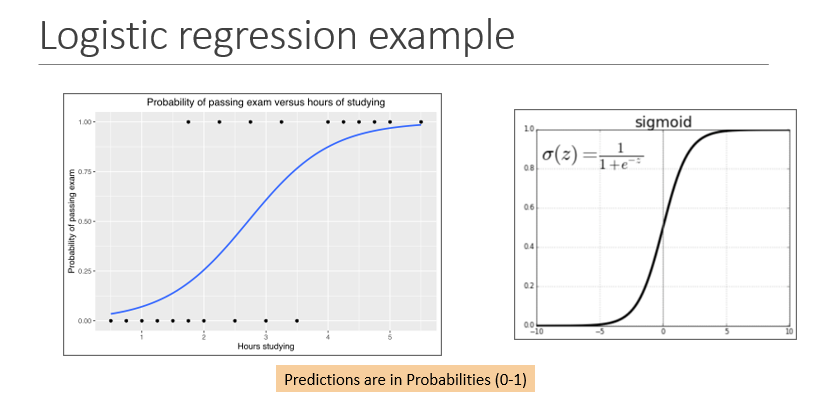

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

# Step 1 - Data Ingestion

In [3]:
import pandas as pd
df= pd.read_csv('iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Traget Feature - species

In [6]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [7]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

# Step 2 - Perform basic data quality checks


In [8]:
df.shape

(150, 5)

In [9]:
df.isna().sum()


sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [10]:
df.duplicated().sum()


np.int64(1)

In [11]:

df = df.drop_duplicates(keep="first").reset_index(drop=True)
df.shape

(149, 5)

In [12]:

df.nunique()

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
dtype: int64

# Step 3 - Seperate X and Y(species)


In [13]:

X = df.drop(columns=["species"])
Y = df["species"]

In [14]:
X.head()


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [15]:
Y.head()


0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

# Step 4 - Applying train test split


In [16]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.33, random_state=21)

In [17]:
xtrain.head()


,sepal_length,sepal_width,petal_length,petal_width
52,6.9,3.1,4.9,1.5
49,5.0,3.3,1.4,0.2
65,6.7,3.1,4.4,1.4
117,7.7,3.8,6.7,2.2
55,5.7,2.8,4.5,1.3


In [18]:
ytrain.head()


52     versicolor
49         setosa
65     versicolor
117     virginica
55     versicolor
Name: species, dtype: object

In [19]:
xtest.head()


,sepal_length,sepal_width,petal_length,petal_width
92,5.8,2.6,4.0,1.2
44,5.1,3.8,1.9,0.4
7,5.0,3.4,1.5,0.2
21,5.1,3.7,1.5,0.4
95,5.7,3.0,4.2,1.2


In [20]:
ytest.head()



92    versicolor
44        setosa
7         setosa
21        setosa
95    versicolor
Name: species, dtype: object

In [21]:
xtrain.shape


(99, 4)

In [22]:
xtest.shape


(50, 4)

# Step 5 - Apply Preprocesssing on xtrain, xtest data

In [23]:
xtrain.dtypes


sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
dtype: object

# Because all datatypes are numeric i can apply standardscaler

In [24]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [25]:

num_pipe = make_pipeline(
    SimpleImputer(strategy="median"), 
    StandardScaler()
).set_output(transform="pandas")

In [26]:
num_pipe.fit(xtrain)


,steps,"[('simpleimputer', ...), ('standardscaler', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,copy,True


In [27]:

xtrain_pre = num_pipe.transform(xtrain)
xtrain_pre.head()

,sepal_length,sepal_width,petal_length,petal_width
52,1.228059,0.047378,0.616798,0.356416
49,-1.032194,0.516425,-1.354794,-1.323832
65,0.990137,0.047378,0.335142,0.227166
117,2.179744,1.689042,1.630760,1.261165
55,-0.199469,-0.656192,0.391473,0.097917


In [28]:

xtest_pre = num_pipe.transform(xtest)
xtest_pre.head()

,sepal_length,sepal_width,petal_length,petal_width
92,-0.080509,-1.125239,0.109817,-0.031333
44,-0.913233,1.689042,-1.073138,-1.065332
7,-1.032194,0.750949,-1.298463,-1.323832
21,-0.913233,1.454519,-1.298463,-1.065332
95,-0.199469,-0.187145,0.222480,-0.031333


# Step 6 - Build the model object


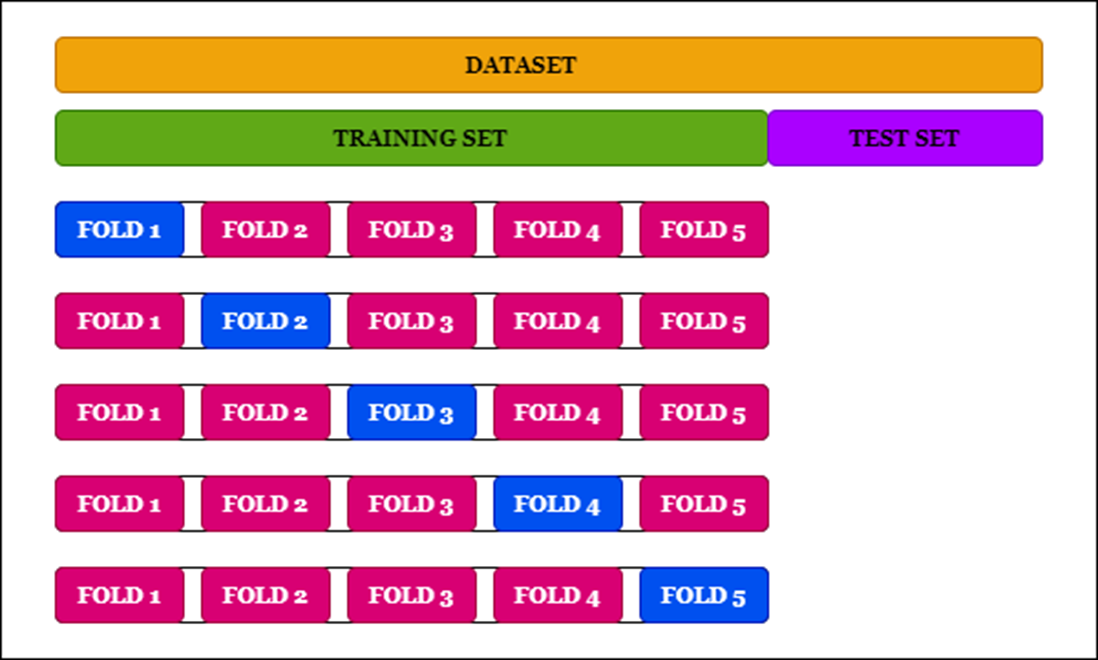

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

model = LogisticRegression(random_state=42)
scores = cross_val_score(model, xtrain_pre, ytrain, cv=5, scoring="f1_macro")
scores

array([0.95213675, 1.        , 1.        , 0.8968254 , 1.        ])

In [30]:

scores.mean()

np.float64(0.9697924297924299)

In [31]:
scores.std()


np.float64(0.04092286096310744)

In [32]:

# fit the model
model.fit(xtrain_pre, ytrain)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [33]:
model.intercept_


array([-0.26149001,  1.71213252, -1.45064251])

In [34]:
model.coef_


array([[-0.92887027,  1.21167588, -1.61658221, -1.59342784],
       [ 0.43257782, -0.43916224, -0.21402588, -0.77312914],
       [ 0.49629244, -0.77251364,  1.83060809,  2.36655698]])

In [ ]:
xtrain_pre.columns


In [35]:
model.classes_


array(['setosa', 'versicolor', 'virginica'], dtype=object)

# Step 7 - Model Evaluation


In [36]:
# Train Accuracy
model.score(xtrain_pre, ytrain)

0.9797979797979798

In [37]:

# Test accuracy
model.score(xtest_pre, ytest)

0.94

In [38]:

ypred_train = model.predict(xtrain_pre)
ypred_train[0:5]

array(['versicolor', 'setosa', 'versicolor', 'virginica', 'versicolor'],
      dtype=object)

In [39]:
ytrain.head()


52     versicolor
49         setosa
65     versicolor
117     virginica
55     versicolor
Name: species, dtype: object

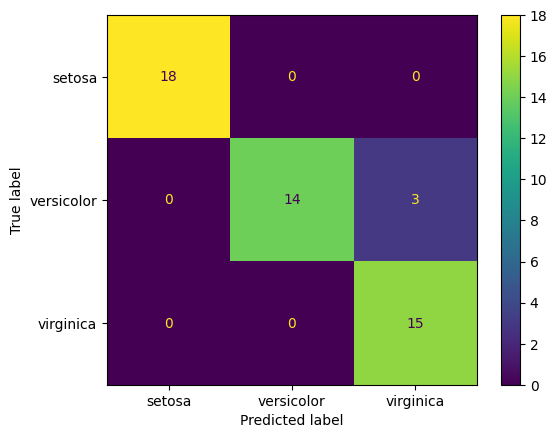

In [40]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model, xtest_pre, ytest)

In [41]:
from sklearn.metrics import classification_report

ypred_test = model.predict(xtest_pre)
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        18
  versicolor       1.00      0.82      0.90        17
   virginica       0.83      1.00      0.91        15

    accuracy                           0.94        50
   macro avg       0.94      0.94      0.94        50
weighted avg       0.95      0.94      0.94        50



In [42]:

from sklearn.metrics import f1_score

f1_test = f1_score(ytest, ypred_test, average="macro")
f1_test

0.9374389051808407

In [43]:

f1_train = f1_score(ytrain, ypred_train, average="macro")
f1_train

0.9800950683303625

In [44]:

gen_err = abs(f1_train - f1_test)
print(gen_err)

0.04265616314952181


# Step 8 - Out of sample prediction


In [45]:
xnew = pd.read_csv("iris_sample.csv")
xnew

,sepal_length,sepal_width,petal_length,petal_width
0,5.5,2.5,4.0,1.3
1,6.9,3.1,5.1,2.3
2,5.1,2.5,3.0,1.1
3,4.4,2.9,NaN,0.2
4,5.9,3.0,5.1,1.8
5,5.5,3.5,1.3,0.2
6,5.6,NaN,3.6,1.3
7,6.5,3.0,5.2,2.0
8,5.3,3.7,1.5,0.2
9,5.1,3.4,1.5,NaN


In [46]:
num_pipe


,steps,"[('simpleimputer', ...), ('standardscaler', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,copy,True


In [47]:
xnew_pre = num_pipe.transform(xnew)
xnew_pre.head()


,sepal_length,sepal_width,petal_length,petal_width
0,-0.437391,-1.359762,0.109817,0.097917
1,1.228059,0.047378,0.729461,1.390415
2,-0.913233,-1.359762,-0.453495,-0.160583
3,-1.745958,-0.421668,0.335142,-1.323832
4,0.038452,-0.187145,0.729461,0.744166


In [48]:
preds = model.predict(xnew_pre)
preds

array(['versicolor', 'virginica', 'versicolor', 'setosa', 'virginica',
       'setosa', 'versicolor', 'virginica', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'versicolor', 'virginica'],
      dtype=object)

In [49]:
probs = model.predict_proba(xnew_pre)
probs

array([[1.86739252e-02, 8.83913243e-01, 9.74128319e-02],
       [1.93661222e-04, 5.97020754e-02, 9.40104263e-01],
       [9.77772503e-02, 8.88881379e-01, 1.33413704e-02],
       [5.79770423e-01, 4.19661319e-01, 5.68257776e-04],
       [6.10945608e-03, 3.23210738e-01, 6.70679806e-01],
       [9.64899594e-01, 3.50994970e-02, 9.09499510e-07],
       [1.40196894e-01, 8.20903512e-01, 3.88995946e-02],
       [8.23632462e-04, 1.54044752e-01, 8.45131615e-01],
       [9.85992175e-01, 1.40074400e-02, 3.84957586e-07],
       [9.04414902e-01, 9.53019243e-02, 2.83173717e-04],
       [2.28698410e-02, 8.95445856e-01, 8.16843030e-02],
       [2.38005395e-02, 9.52419547e-01, 2.37799135e-02],
       [4.69764301e-06, 1.71710436e-02, 9.82824259e-01],
       [5.93255838e-03, 6.68652095e-01, 3.25415347e-01],
       [5.31595677e-04, 4.92136889e-01, 5.07331515e-01]])

In [50]:

model.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [51]:

xnew["species"] = preds
xnew[model.classes_] = probs.round(4)

In [52]:
xnew


,sepal_length,sepal_width,petal_length,petal_width,species,setosa,versicolor,virginica
0,5.5,2.5,4.0,1.3,versicolor,0.0187,0.8839,0.0974
1,6.9,3.1,5.1,2.3,virginica,0.0002,0.0597,0.9401
2,5.1,2.5,3.0,1.1,versicolor,0.0978,0.8889,0.0133
3,4.4,2.9,NaN,0.2,setosa,0.5798,0.4197,0.0006
4,5.9,3.0,5.1,1.8,virginica,0.0061,0.3232,0.6707
5,5.5,3.5,1.3,0.2,setosa,0.9649,0.0351,0.0000
6,5.6,NaN,3.6,1.3,versicolor,0.1402,0.8209,0.0389
7,6.5,3.0,5.2,2.0,virginica,0.0008,0.1540,0.8451
8,5.3,3.7,1.5,0.2,setosa,0.9860,0.0140,0.0000
9,5.1,3.4,1.5,NaN,setosa,0.9044,0.0953,0.0003


In [53]:
xnew["species"].value_counts()


species
versicolor    6
virginica     5
setosa        4
Name: count, dtype: int64

In [54]:
xnew.to_csv("results.csv", index=False)


# Step 9 - Save preprocessor and model


In [55]:
num_pipe


,steps,"[('simpleimputer', ...), ('standardscaler', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,copy,True


In [56]:
model


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [57]:

import joblib

joblib.dump(num_pipe, "pre.joblib")

['pre.joblib']

In [58]:
joblib.dump(model, "iris_model.joblib")


['iris_model.joblib']

In [59]:

p = joblib.load("pre.joblib")
p

,steps,"[('simpleimputer', ...), ('standardscaler', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,copy,True


In [60]:
m = joblib.load("iris_model.joblib")
m

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'
